# Using CG

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg

n = 500
rand = np.random.RandomState(0)

Q, _ = np.linalg.qr(rand.randn(n, n))
D = np.diag(rand.rand(n))
A = Q.T @ D @ Q

b = np.random.rand(500)

def solve_cg(maxiter):
    x, _ = cg(A, b, maxiter=maxiter)
    residual = b - A@x
    return np.linalg.norm(residual)

x = range(1, 100)
r_size = [solve_cg(i) for i in x]

Text(0.5, 1.0, 'Conjugate Gradient (no preconditioner)')

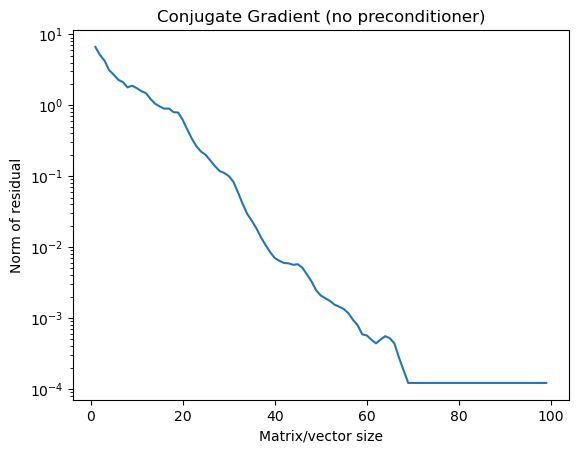

In [27]:
plt.plot(x, r_size)
plt.yscale("log")
plt.xlabel("Matrix/vector size")
plt.ylabel("Norm of residual")
plt.title("Conjugate Gradient (no preconditioner)")

# SPAI preconditioning

In [21]:
def spai(A, m):
    """Perform m step of the SPAI iteration."""
    from scipy.sparse import identity
    from scipy.sparse import diags
    from scipy.sparse.linalg import onenormest
    
    n = A.shape[0]
    
    ident = identity(n, format='csr')
    alpha = 2 / onenormest(A @ A.T)
    M = alpha * A
        
    for index in range(m):
        C = A @ M
        G = ident - C
        AG = A @ G
        trace = (G.T @ AG).diagonal().sum()
        alpha = trace / np.linalg.norm(AG.data)**2
        M = M + alpha * G
        
    return M

In [37]:
from timeit import timeit

def solve_spai(m):
    M = spai(A, m)
    x, _ = cg(A, b, M=M, maxiter=100)
    residual = b - A@x
    return np.linalg.norm(residual)

def time_spai():
    t = timeit("solve_spai(i)", "from __main__ import A, i, solve_spai", number=1)
    return t

x = range(1, 100)
i = 1
times = []
r_size = []
for i in x:
    r_size.append(solve_spai(i))
    times.append(time_spai())

Text(0.5, 1.0, 'Conjugate gradient (SPAI preconditioner)')

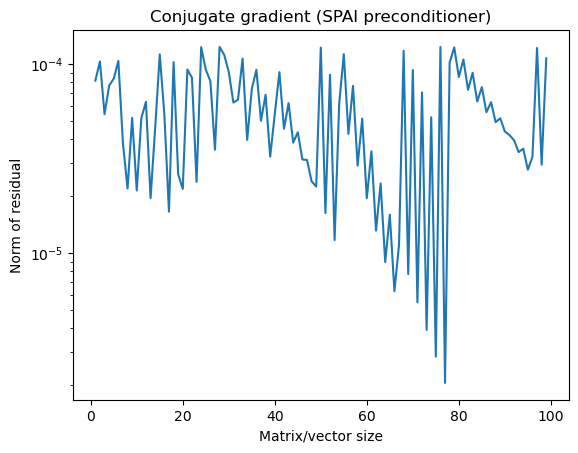

In [38]:
plt.plot(x, r_size)
plt.yscale("log")
plt.xlabel("Matrix/vector size")
plt.ylabel("Norm of residual")
plt.title("Conjugate gradient (SPAI preconditioner)")

Text(0.5, 1.0, 'Time to compute SPAI preconditioner')

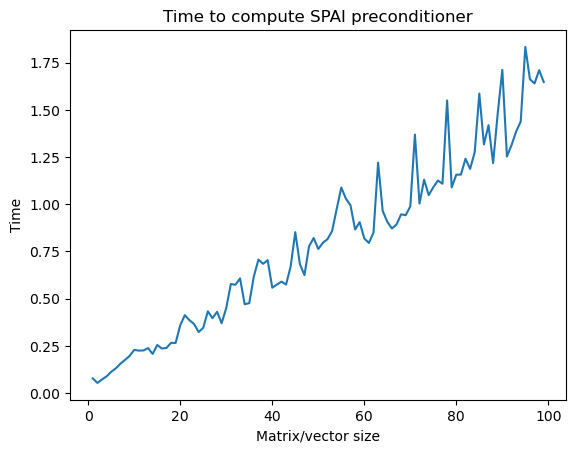

In [40]:
plt.plot(x, times)
plt.xlabel("Matrix/vector size")
plt.ylabel("Time")
plt.title("Time to compute SPAI preconditioner")

Text(0.5, 1.0, 'Residual increase/decrease per time taken to compute SPAI')

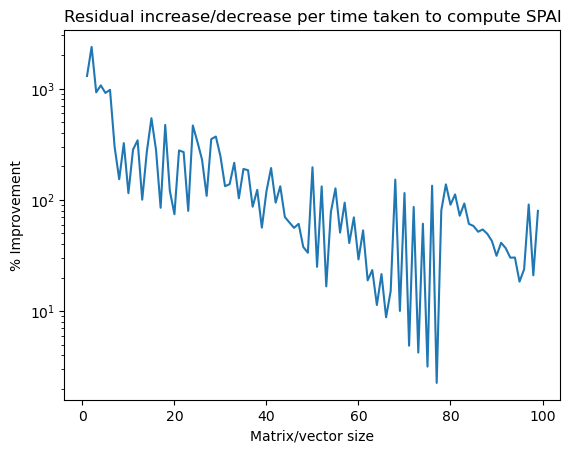

In [43]:
normalised_residual = r_size/r_size[0]
residual_improve_per_time = normalised_residual/times

plt.plot(x, 100*residual_improve_per_time)
plt.xlabel("Matrix/vector size")
plt.yscale("log")
plt.ylabel("% Improvement")
plt.title("Residual increase/decrease per time taken to compute SPAI")